In [1]:
import numpy as np
import matplotlib.pyplot as plt

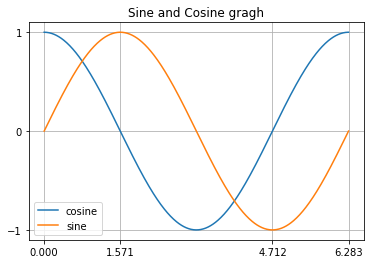

In [3]:
xs= np.linspace(0, 2*np.pi, 500)
cosx = np.cos(xs)
sinx = np.sin(xs)

plt.plot(xs, cosx, label='cosine')
plt.plot(xs, sinx, label='sine')
plt.yticks([-1,0,1])
plt.xticks([0, np.pi/2, 1.5*np.pi, 2*np.pi])
plt.grid()
plt.title('Sine and Cosine gragh')
plt.legend()
plt.show()


In [4]:
v1, v2, v3 = np.array([0,1]), np.array([1,0]), np.array([-1,0])
v1_norm = sum(np.square(v1))
v2_norm = sum(np.square(v2))
v3_norm = sum(np.square(v3))

In [5]:
np.dot(v1, v2) / (v1_norm * v2_norm)

0.0

In [8]:
def cos_similarity(v1,v2):
    v1_norm = np.sqrt(sum(np.square(v1)))
    v2_norm = np.sqrt(sum(np.square(v2)))
    return np.dot(v1,v2) / (v1_norm * v2_norm)

In [9]:
cos_similarity(np.array([1,0]), np.array([1,1]))

0.7071067811865475

- 문장의 코사인 유사도

In [10]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()
feature_cv = cvect.fit_transform(doc_list)
feature_cv.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]])

In [15]:
f1 = feature_cv.toarray()[0]
f2 = feature_cv.toarray()[1]
f3 = feature_cv.toarray()[2]

In [16]:
print(f'문장1 vs 문장2: {cos_similarity(f1,f2):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(f1,f3):.4f}')
print(f'문장2 vs 문장3: {cos_similarity(f2,f3):.4f}')

문장1 vs 문장2: 0.6093
문장1 vs 문장3: 0.6396
문장2 vs 문장3: 0.6804


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()
feature_tv = tvect.fit_transform(doc_list)
feature_tv.toarray()

array([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
        0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
        0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
        0.49087711, 0.        , 0.24543856],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
        0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
        0.23402865, 0.39624495, 0.4680573 ],
       [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
        0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
        0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
        0.3660119 , 0.        , 0.3660119 ]])

In [19]:
f1 = feature_tv.toarray()[0]
f2 = feature_tv.toarray()[1]
f3 = feature_tv.toarray()[2]
print(f'문장1 vs 문장2: {cos_similarity(f1,f2):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(f1,f3):.4f}')
print(f'문장2 vs 문장3: {cos_similarity(f2,f3):.4f}')

문장1 vs 문장2: 0.4021
문장1 vs 문장3: 0.4043
문장2 vs 문장3: 0.4565


- Scikit-Learn 코사인 유사도

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(feature_tv, feature_tv)

array([[1.        , 0.40207758, 0.40425045],
       [0.40207758, 1.        , 0.45647296],
       [0.40425045, 0.45647296, 1.        ]])

In [ ]:
import pandas as pd
import glob, os

path = 'OpinosisDataset1.0/topics'
os.path.join(path, '*.data')

In [ ]:
from nltk import word_tokenize

def simple_tokenizer(text):         # 글자수가 2개 이하인 토큰은 제거
    return [word for word in word_list if len(word) > 2]

In [ ]:
# Cluster 1 : 호텔
hotel_indices = df[df.cluster_label == 1].index
hotel_indices

In [ ]:
# 호텔로 클러스터링된 데이터 중 첫번째 문서
comparison_docname = df.iloc[hotel_indices[0]]['filename']
comparison_docname

In [ ]:
# 호텔로 군집화된 데이터 중에서 코사인 유사도 계산
similarity_pair = cosine_similarity(feature[hotel_indices[0], feature[hotel_indices]]
similarity_pair

- Opinion Review 데이터셋의 문서 유사도

In [ ]:
import pandas as pd
import os.glob

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

plt.figure(figsize=(10,6))
sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname, fontsize=15)
plt.show()